In [15]:
# 📘 Predicting WTA Heat Rule Triggers Without Using WBGT
# Goal: Use other features to predict whether the heat rule will be triggered in a match

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load cleaned data
df = pd.read_csv("merged_wta_environmental_data_with_fixed_geo.csv")

# 📌 Step 1: Create binary label (was the heat rule triggered?)
df['heat_rule_triggered'] = (df['WBGT'] >= 30.1).astype(int)

# 🧹 Step 2: Drop rows with missing values in relevant features
features = ['Air Temperature (TA)', 'Relative Humidity_sb', 'AQI Reading_sb', 'Year_sb', 'City']
df = df[features + ['heat_rule_triggered']].dropna()

# 🧪 Step 3: Encode categorical variable ('City')
df = pd.get_dummies(df, columns=['City'], drop_first=True)

# 🧮 Step 4: Check class balance
print("Class distribution:\n", df['heat_rule_triggered'].value_counts())

# 🧪 Step 5: Split data (stratified)
X = df.drop(columns='heat_rule_triggered')
y = df['heat_rule_triggered']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ⚖️ Step 6: Oversample minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("New training class distribution:\n", y_train_bal.value_counts())

Class distribution:
 heat_rule_triggered
0    981
1     76
Name: count, dtype: int64
New training class distribution:
 heat_rule_triggered
0    686
1    686
Name: count, dtype: int64


In [16]:
# 🌲 Step 7: Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_bal, y_train_bal)

# 📈 Step 8: Evaluate
y_pred = clf.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       295
           1       0.60      0.91      0.72        23

    accuracy                           0.95       318
   macro avg       0.80      0.93      0.85       318
weighted avg       0.96      0.95      0.95       318


🧮 Confusion Matrix:
[[281  14]
 [  2  21]]


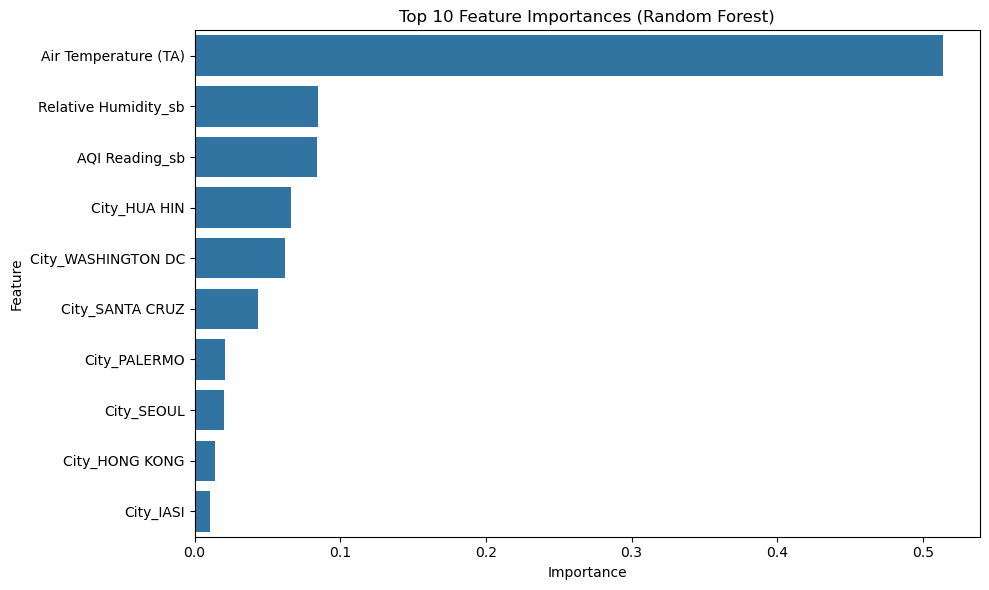

In [17]:
# 🔍 Step 9: Feature Importance
importances = clf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp_df = feat_imp_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x="Importance", y="Feature")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()